In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import datetime as dt

## Music Data

In [3]:
bil = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/billboard/billboard_weekly.pkl')
bil

,date,song,artist,song_id
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d
...,...,...,...,...
254882,1973-01-06,The Red Back Spider,Brownsville Station,6UGHk2cmbDC1oidVjXcCKo
254883,1973-01-06,She's Got To Be A Saint,Ray Price,0md3dDLRwrsgBQ59CfgmXO
254884,1973-01-06,Soul Song,Joe Stampley,5r9h2NUZTuQD3mvZXfMGmU
254885,1973-01-06,On And Off (Part 1),Anacostia,37Edt4Ro7v2STgu75Fj35o


In [4]:
audio = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/spotify_data/billboard_audio_features.pkl')
audio = audio.drop_duplicates()
audio

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,uri,valence
0,0.5780,0.604,224695,0.366,0.000000,5,0.1330,-7.519,1,0.0282,141.981,4,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.130
2,0.0383,0.591,141806,0.764,0.000000,1,0.1030,-5.484,1,0.0483,169.928,4,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.478
5,0.0203,0.736,212000,0.704,0.000000,3,0.0501,-7.409,0,0.0615,149.995,4,spotify:track:27NovPIUIRrOZoCHxABJwK,0.894
9,0.1110,0.647,161853,0.765,0.000000,1,0.3150,-6.459,1,0.0600,79.994,4,spotify:track:58UKC45GPNTflCN6nwCUeF,0.855
14,0.0451,0.807,230747,0.893,0.000028,11,0.3660,-3.745,0,0.0347,126.011,4,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003120,0.2630,0.598,194240,0.560,0.000095,10,0.4300,-10.529,1,0.0290,110.402,4,spotify:track:6WdhPUH1mvuvtmDjLSSAZn,0.676
1003202,0.2150,0.512,153173,0.977,0.000000,2,0.3430,-4.505,1,0.0671,120.165,4,spotify:track:6LqbJXriVJyqJCd9jYoPqP,0.731
1003285,0.1630,0.535,183360,0.366,0.000000,9,0.0791,-16.004,1,0.0496,88.732,4,spotify:track:3BmQL02PItbRsBL6j7VJc3,0.590
1003369,0.1400,0.693,317213,0.370,0.000199,7,0.4600,-13.270,1,0.0295,102.827,4,spotify:track:0WTCCeS8DRcFGOu43p0A2C,0.312


In [58]:
audio.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,19884.000000,19884.000000,1.988400e+04,19884.000000,19884.000000,19884.000000,19884.000000,19884.000000,19884.000000,19884.000000,19884.000000,19884.00000,19884.000000
mean,0.212193,0.629513,2.385928e+05,0.650190,0.035178,5.262321,0.183996,-8.075150,0.677731,0.086314,120.841825,3.96203,0.571619
std,0.239991,0.149403,6.248940e+04,0.190454,0.145348,3.594478,0.153683,3.668177,0.467357,0.094940,27.838293,0.27249,0.240669
min,0.000002,0.058600,2.968800e+04,0.000530,0.000000,0.000000,0.014600,-42.391000,0.000000,0.022000,36.998000,1.00000,0.000010
25%,0.027900,0.534000,2.016930e+05,0.521000,0.000000,2.000000,0.088800,-10.191250,0.000000,0.033300,99.826000,4.00000,0.377000
50%,0.114000,0.638000,2.308805e+05,0.670000,0.000004,5.000000,0.125000,-7.338000,1.000000,0.045400,119.922000,4.00000,0.585000
75%,0.321250,0.736000,2.656670e+05,0.801000,0.000500,8.000000,0.234000,-5.399750,1.000000,0.087000,137.451250,4.00000,0.771000
max,0.996000,0.988000,1.561133e+06,0.998000,0.986000,11.000000,0.997000,2.291000,1.000000,0.951000,218.363000,5.00000,0.991000


/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_81315/1716794225.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  audio.hist(ax=ax, bins=35)


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'time_signature'}>],
       [<AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

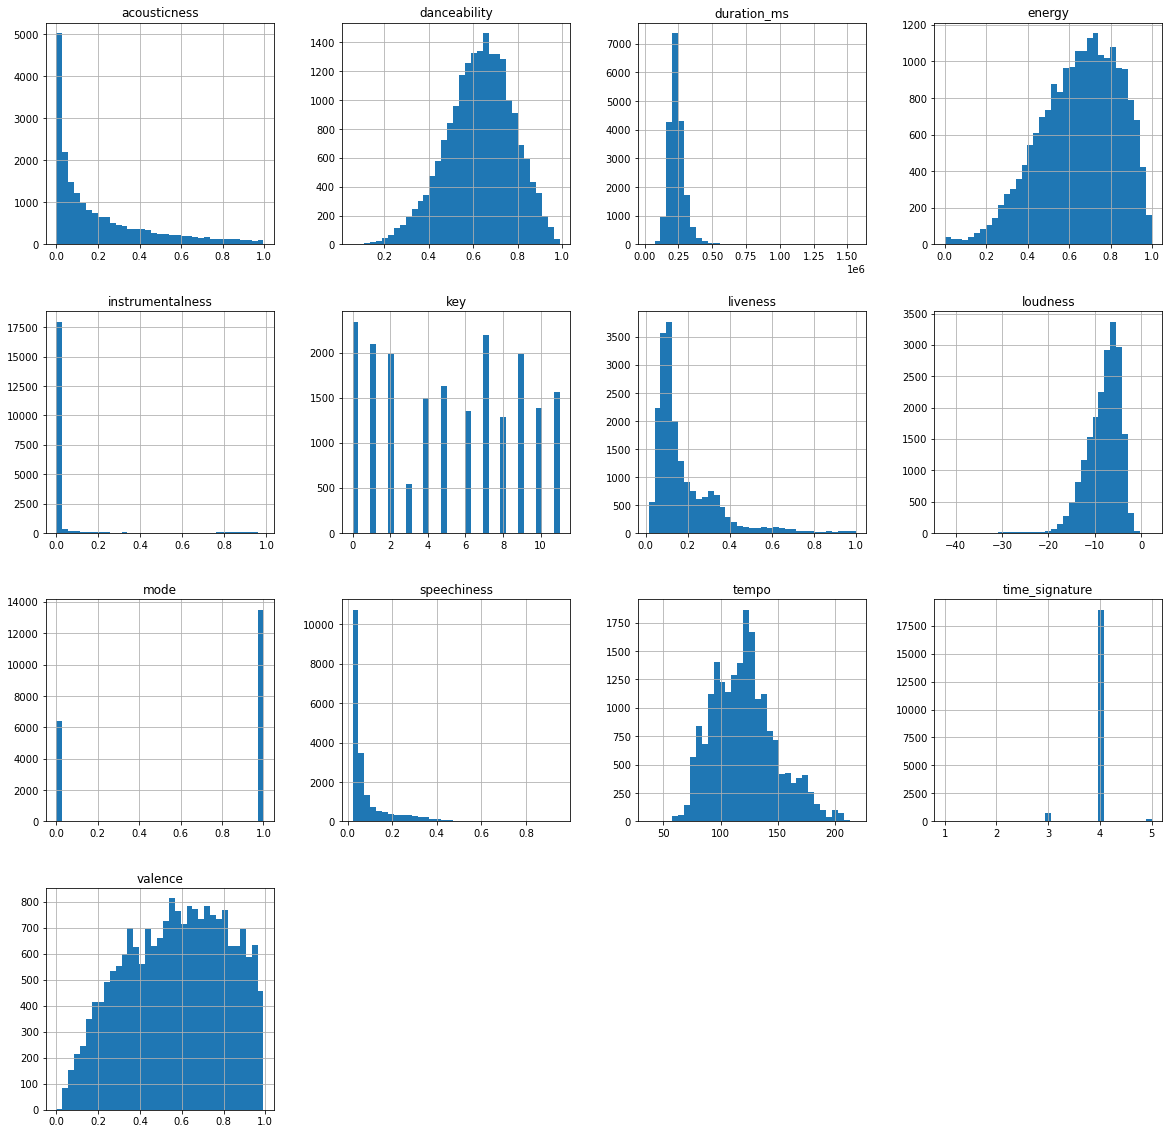

In [63]:
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(20,20))

audio.hist(ax=ax, bins=35)

In [5]:
bil['uri'] = 'spotify:track:' + bil['song_id']
bil

,date,song,artist,song_id,uri
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d
...,...,...,...,...,...
254882,1973-01-06,The Red Back Spider,Brownsville Station,6UGHk2cmbDC1oidVjXcCKo,spotify:track:6UGHk2cmbDC1oidVjXcCKo
254883,1973-01-06,She's Got To Be A Saint,Ray Price,0md3dDLRwrsgBQ59CfgmXO,spotify:track:0md3dDLRwrsgBQ59CfgmXO
254884,1973-01-06,Soul Song,Joe Stampley,5r9h2NUZTuQD3mvZXfMGmU,spotify:track:5r9h2NUZTuQD3mvZXfMGmU
254885,1973-01-06,On And Off (Part 1),Anacostia,37Edt4Ro7v2STgu75Fj35o,spotify:track:37Edt4Ro7v2STgu75Fj35o


In [6]:
merged = pd.merge(bil, audio, how='left', on='uri')
merged

,date,song,artist,song_id,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.5780,0.604,224695.0,0.366,0.000000,5.0,0.1330,-7.519,1.0,0.0282,141.981,4.0,0.130
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.0383,0.591,141806.0,0.764,0.000000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,0.0203,0.736,212000.0,0.704,0.000000,3.0,0.0501,-7.409,0.0,0.0615,149.995,4.0,0.894
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF,0.1110,0.647,161853.0,0.765,0.000000,1.0,0.3150,-6.459,1.0,0.0600,79.994,4.0,0.855
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.0451,0.807,230747.0,0.893,0.000028,11.0,0.3660,-3.745,0.0,0.0347,126.011,4.0,0.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254882,1973-01-06,The Red Back Spider,Brownsville Station,6UGHk2cmbDC1oidVjXcCKo,spotify:track:6UGHk2cmbDC1oidVjXcCKo,0.0174,0.528,370427.0,0.921,0.000186,2.0,0.0472,-7.640,1.0,0.0524,144.368,4.0,0.298
254883,1973-01-06,She's Got To Be A Saint,Ray Price,0md3dDLRwrsgBQ59CfgmXO,spotify:track:0md3dDLRwrsgBQ59CfgmXO,0.8580,0.414,228267.0,0.299,0.212000,10.0,0.1280,-12.293,1.0,0.0303,88.516,3.0,0.447
254884,1973-01-06,Soul Song,Joe Stampley,5r9h2NUZTuQD3mvZXfMGmU,spotify:track:5r9h2NUZTuQD3mvZXfMGmU,0.7010,0.673,167483.0,0.595,0.000000,1.0,0.1290,-7.766,1.0,0.0418,132.019,4.0,0.690
254885,1973-01-06,On And Off (Part 1),Anacostia,37Edt4Ro7v2STgu75Fj35o,spotify:track:37Edt4Ro7v2STgu75Fj35o,0.0621,0.696,136276.0,0.602,0.000000,1.0,0.1370,-3.123,1.0,0.3480,175.147,4.0,0.487


In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254887 entries, 0 to 254886
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              254887 non-null  object 
 1   song              254887 non-null  object 
 2   artist            254887 non-null  object 
 3   song_id           254887 non-null  object 
 4   uri               254887 non-null  object 
 5   acousticness      254867 non-null  float64
 6   danceability      254867 non-null  float64
 7   duration_ms       254867 non-null  float64
 8   energy            254867 non-null  float64
 9   instrumentalness  254867 non-null  float64
 10  key               254867 non-null  float64
 11  liveness          254867 non-null  float64
 12  loudness          254867 non-null  float64
 13  mode              254867 non-null  float64
 14  speechiness       254867 non-null  float64
 15  tempo             254867 non-null  float64
 16  time_signature    25

In [8]:
df = merged.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254867 entries, 0 to 254886
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              254867 non-null  object 
 1   song              254867 non-null  object 
 2   artist            254867 non-null  object 
 3   song_id           254867 non-null  object 
 4   uri               254867 non-null  object 
 5   acousticness      254867 non-null  float64
 6   danceability      254867 non-null  float64
 7   duration_ms       254867 non-null  float64
 8   energy            254867 non-null  float64
 9   instrumentalness  254867 non-null  float64
 10  key               254867 non-null  float64
 11  liveness          254867 non-null  float64
 12  loudness          254867 non-null  float64
 13  mode              254867 non-null  float64
 14  speechiness       254867 non-null  float64
 15  tempo             254867 non-null  float64
 16  time_signature    25

In [9]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,254867.000000,254867.000000,2.548670e+05,254867.000000,254867.000000,254867.000000,254867.000000,254867.000000,254867.000000,254867.000000,254867.000000,254867.000000,254867.000000
mean,0.201667,0.635467,2.423155e+05,0.653487,0.029151,5.281311,0.180003,-7.943069,0.681712,0.079514,120.320712,3.967591,0.579500
std,0.228701,0.145827,5.869251e+04,0.186959,0.130725,3.591599,0.151156,3.547354,0.465813,0.087168,27.650305,0.246580,0.236797
min,0.000002,0.058600,2.968800e+04,0.000530,0.000000,0.000000,0.014600,-42.391000,0.000000,0.022000,36.998000,1.000000,0.000010
25%,0.027300,0.543000,2.075870e+05,0.524000,0.000000,2.000000,0.086700,-10.005000,0.000000,0.032800,99.069000,4.000000,0.391000
50%,0.107000,0.644000,2.349100e+05,0.673000,0.000004,5.000000,0.122000,-7.218000,1.000000,0.043900,119.082000,4.000000,0.594000
75%,0.304000,0.739000,2.681730e+05,0.802000,0.000373,8.000000,0.230000,-5.321000,1.000000,0.077900,136.086000,4.000000,0.774000
max,0.996000,0.988000,1.561133e+06,0.998000,0.986000,11.000000,0.997000,2.291000,1.000000,0.951000,218.363000,5.000000,0.991000


In [19]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
weekly_df = df.resample('W', closed='left', loffset=pd.DateOffset(days=-1)).mean()
weekly_df = weekly_df.reset_index()
weekly_df = weekly_df.iloc[:-2, :]
weekly_df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_77548/1666046937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_77548/1666046937.py:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  weekly_df = df.resample('W', closed='left', loffset=pd.DateOffset(days=-1)).mean()


,date,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1973-01-06,0.444307,0.54897,211019.04,0.516088,0.038713,4.90,0.177994,-11.13137,0.72,0.045512,121.69144,3.92,0.609068
1,1973-01-13,0.463003,0.54445,210889.44,0.507223,0.057663,4.99,0.172526,-11.24892,0.69,0.046435,121.17280,3.92,0.611278
2,1973-01-20,0.459998,0.55488,212427.10,0.499573,0.056725,4.73,0.150810,-11.39647,0.70,0.046792,122.29380,3.93,0.618178
3,1973-01-27,0.462581,0.55552,216442.78,0.493036,0.056252,4.61,0.142808,-11.64414,0.70,0.047049,122.09168,3.96,0.628527
4,1973-02-03,0.442189,0.55225,218093.12,0.497118,0.056849,4.29,0.143832,-11.80466,0.68,0.044456,122.39044,3.96,0.643207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,2021-09-25,0.211358,0.65412,208198.80,0.634210,0.001231,5.44,0.180776,-6.25545,0.71,0.132614,125.32709,3.96,0.505129
2543,2021-10-02,0.211664,0.67168,202406.23,0.643120,0.000159,5.18,0.181925,-6.14228,0.70,0.129078,124.93760,3.96,0.511533
2544,2021-10-09,0.209382,0.66886,198502.43,0.646080,0.000114,5.10,0.183224,-6.24480,0.72,0.149150,123.67898,3.98,0.513393
2545,2021-10-16,0.213577,0.66035,202807.60,0.650760,0.000314,4.83,0.182424,-6.06168,0.71,0.138482,124.58022,3.95,0.502659


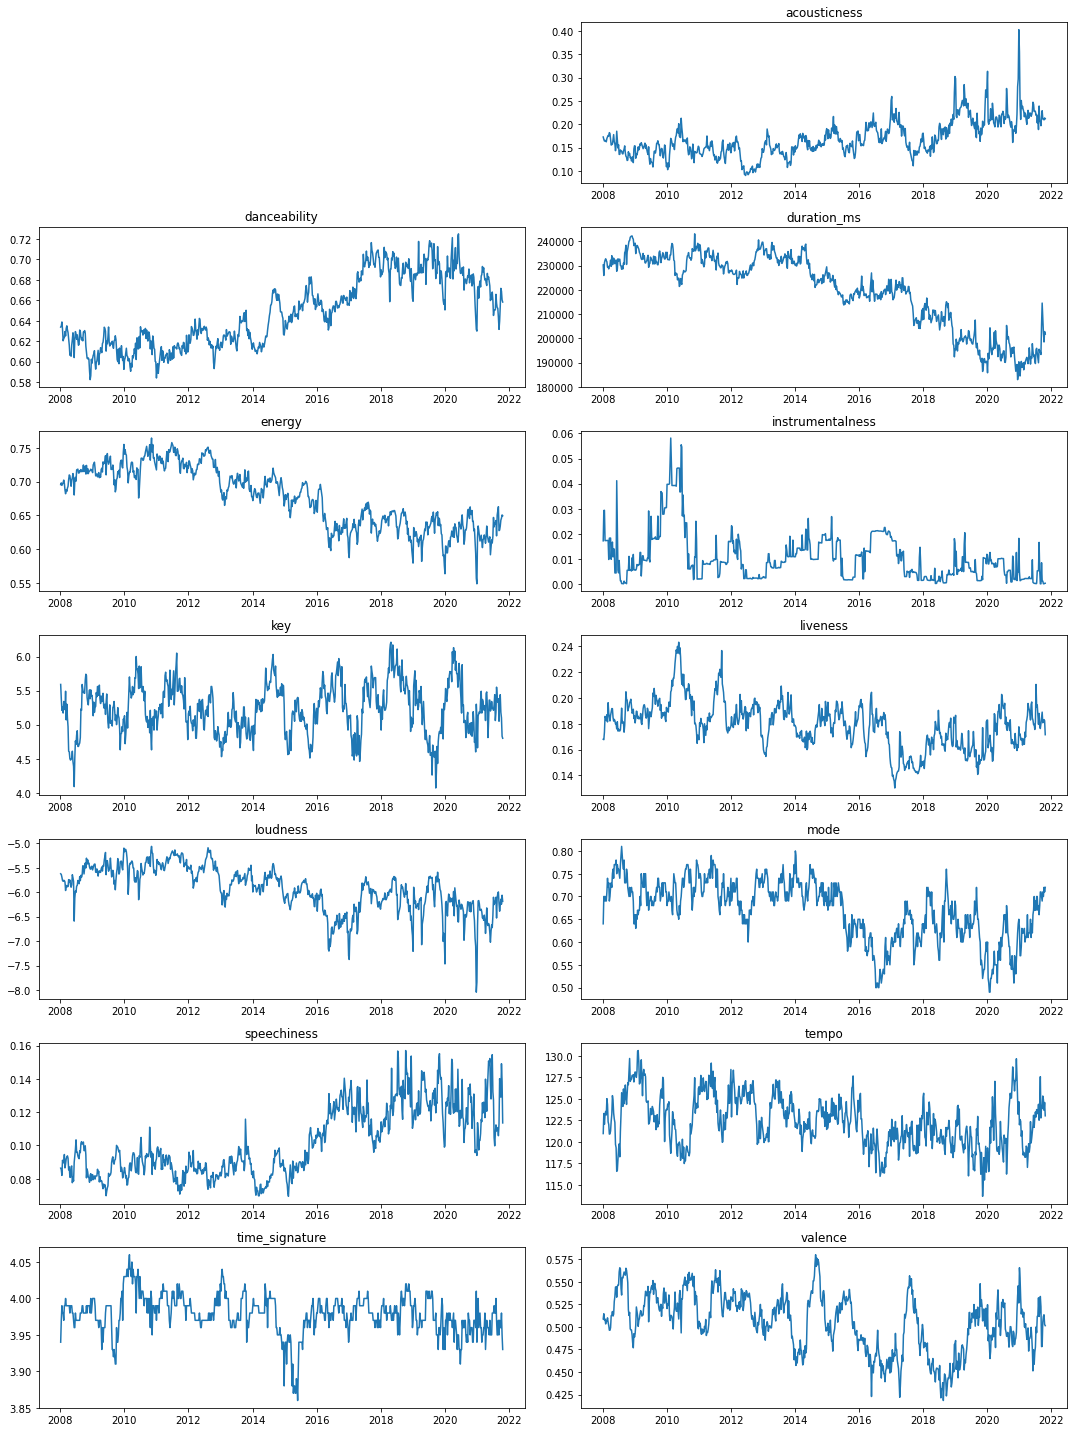

In [43]:
fig = plt.figure(figsize=[15, 20])

# ax1 = fig.add_subplot(7, 2, 1)
ax2 = fig.add_subplot(7, 2, 2)
ax3 = fig.add_subplot(7, 2, 3)
ax4 = fig.add_subplot(7, 2, 4)
ax5 = fig.add_subplot(7, 2, 5)
ax6 = fig.add_subplot(7, 2, 6)
ax7 = fig.add_subplot(7, 2, 7)
ax8 = fig.add_subplot(7, 2, 8)
ax9 = fig.add_subplot(7, 2, 9)
ax10 = fig.add_subplot(7, 2, 10)
ax11 = fig.add_subplot(7, 2, 11)
ax12 = fig.add_subplot(7, 2, 12)
ax13 = fig.add_subplot(7, 2, 13)
ax14 = fig.add_subplot(7, 2, 14)

x = weekly_df['date']
# y1 = weekly_df['streams']
y2 = weekly_df['acousticness']
y3 = weekly_df['danceability']
y4 = weekly_df['duration_ms']
y5 = weekly_df['energy']
y6 = weekly_df['instrumentalness']
y7 = weekly_df['key']
y8 = weekly_df['liveness']
y9 = weekly_df['loudness']
y10 = weekly_df['mode']
y11 = weekly_df['speechiness']
y12 = weekly_df['tempo']
y13 = weekly_df['time_signature']
y14 = weekly_df['valence']

# ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)
ax10.plot(x, y10)
ax11.plot(x, y11)
ax12.plot(x, y12)
ax13.plot(x, y13)
ax14.plot(x, y14)


# ax1.set_title('streams')
ax2.set_title('acousticness')
ax3.set_title('danceability')
ax4.set_title('duration_ms')
ax5.set_title('energy')
ax6.set_title('instrumentalness')
ax7.set_title('key')
ax8.set_title('liveness')
ax9.set_title('loudness')
ax10.set_title('mode')
ax11.set_title('speechiness')
ax12.set_title('tempo')
ax13.set_title('time_signature')
ax14.set_title('valence')


fig.tight_layout()
plt.show()

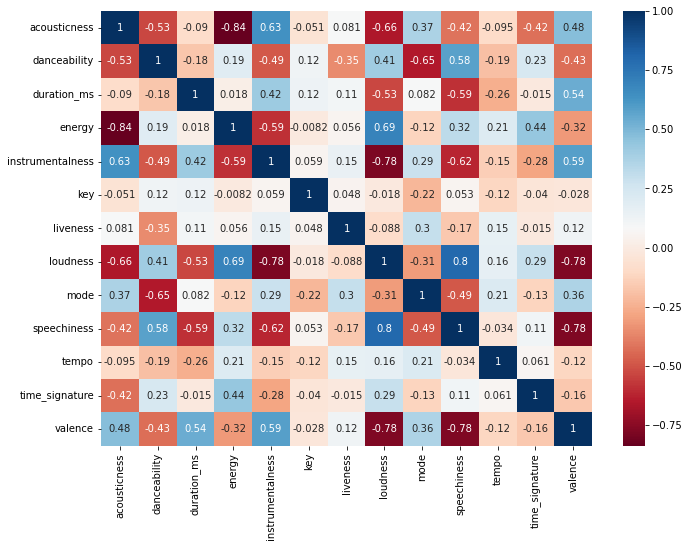

In [13]:
corr = weekly_df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="RdBu",annot=True)
plt.show()

## Econ Data

In [14]:
wei = pd.read_csv('/Users/kohtaasakura/PyDev/grad_thesis/economic_indicators/wei.csv')
wei

,DATE,WEI
0,2008-01-05,1.68
1,2008-01-12,1.63
2,2008-01-19,1.60
3,2008-01-26,1.10
4,2008-02-02,0.79
...,...,...
778,2022-12-03,1.30
779,2022-12-10,0.73
780,2022-12-17,1.57
781,2022-12-24,2.05


In [16]:
wei['DATE'] = pd.to_datetime(wei['DATE'])
wei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    783 non-null    datetime64[ns]
 1   WEI     783 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.4 KB


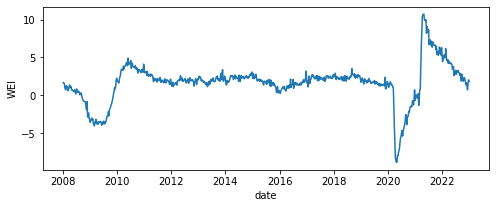

In [17]:
plt.figure(figsize=(8,3))
plt.xlabel('date')
plt.ylabel('WEI')
plt.plot(wei['DATE'], wei['WEI'])

In [21]:
weekly_df = weekly_df[weekly_df['date'] >= '2008-01-05']
weekly_df.head()

,date,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1826,2008-01-05,0.172761,0.63383,230281.78,0.69555,0.017234,5.59,0.168061,-5.62282,0.64,0.086362,120.96793,3.94,0.508751
1827,2008-01-12,0.167753,0.63483,225947.49,0.69811,0.029290,5.38,0.167698,-5.63751,0.70,0.085456,123.29932,3.97,0.514521
1828,2008-01-19,0.163993,0.63882,231132.41,0.69445,0.029395,5.21,0.173653,-5.69283,0.70,0.082006,122.04055,3.99,0.507521
1829,2008-01-26,0.165388,0.63193,232238.01,0.69647,0.017314,5.26,0.185720,-5.75950,0.69,0.091100,123.19910,3.98,0.508611
1830,2008-02-02,0.164330,0.62042,232839.20,0.69841,0.017314,5.17,0.184612,-5.77714,0.70,0.089547,123.53852,3.98,0.503211


In [23]:
wei = wei[wei['DATE'] <= '2021-10-23']
wei.tail()

,DATE,WEI
716,2021-09-25,6.59
717,2021-10-02,6.62
718,2021-10-09,6.01
719,2021-10-16,6.47
720,2021-10-23,5.41


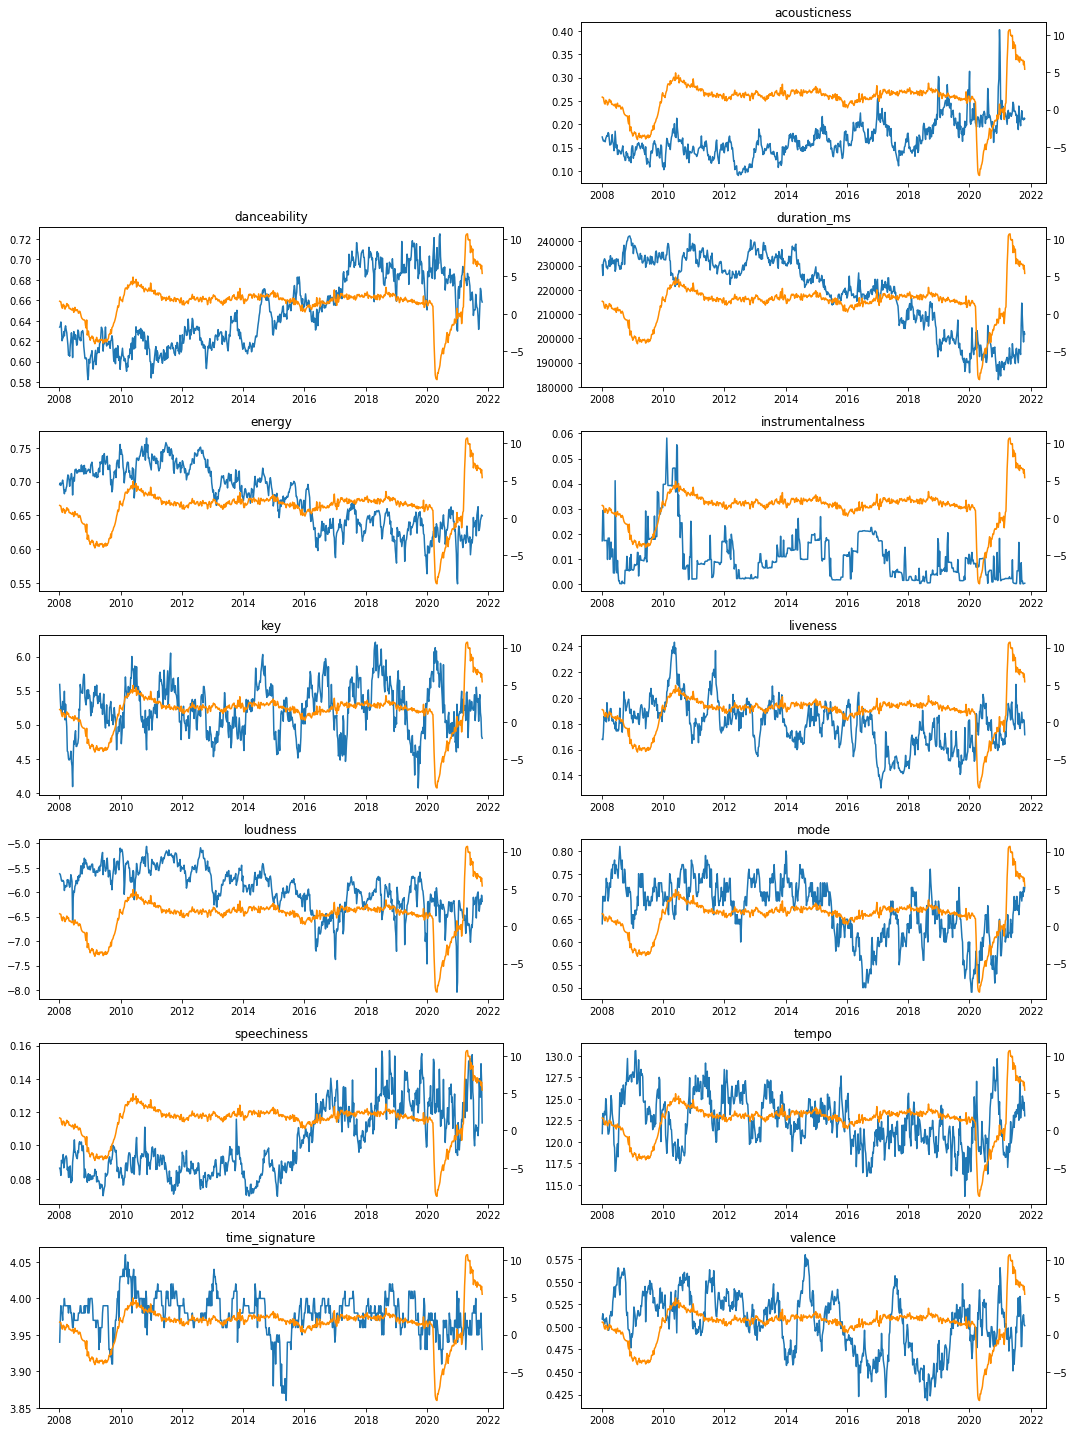

In [24]:
fig = plt.figure(figsize=[15, 20])

# ax1 = fig.add_subplot(7, 2, 1)
ax2 = fig.add_subplot(7, 2, 2)
ax3 = fig.add_subplot(7, 2, 3)
ax4 = fig.add_subplot(7, 2, 4)
ax5 = fig.add_subplot(7, 2, 5)
ax6 = fig.add_subplot(7, 2, 6)
ax7 = fig.add_subplot(7, 2, 7)
ax8 = fig.add_subplot(7, 2, 8)
ax9 = fig.add_subplot(7, 2, 9)
ax10 = fig.add_subplot(7, 2, 10)
ax11 = fig.add_subplot(7, 2, 11)
ax12 = fig.add_subplot(7, 2, 12)
ax13 = fig.add_subplot(7, 2, 13)
ax14 = fig.add_subplot(7, 2, 14)

x = weekly_df['date']
# y1 = weekly_df['streams']
y2 = weekly_df['acousticness']
y3 = weekly_df['danceability']
y4 = weekly_df['duration_ms']
y5 = weekly_df['energy']
y6 = weekly_df['instrumentalness']
y7 = weekly_df['key']
y8 = weekly_df['liveness']
y9 = weekly_df['loudness']
y10 = weekly_df['mode']
y11 = weekly_df['speechiness']
y12 = weekly_df['tempo']
y13 = weekly_df['time_signature']
y14 = weekly_df['valence']

z = wei['WEI']

# ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)
ax10.plot(x, y10)
ax11.plot(x, y11)
ax12.plot(x, y12)
ax13.plot(x, y13)
ax14.plot(x, y14)

# ax1_1 = ax1.twinx()
ax2_1 = ax2.twinx()
ax3_1 = ax3.twinx()
ax4_1 = ax4.twinx()
ax5_1 = ax5.twinx()
ax6_1 = ax6.twinx()
ax7_1 = ax7.twinx()
ax8_1 = ax8.twinx()
ax9_1 = ax9.twinx()
ax10_1 = ax10.twinx()
ax11_1 = ax11.twinx()
ax12_1 = ax12.twinx()
ax13_1 = ax13.twinx()
ax14_1 = ax14.twinx()


# ax1_1.plot(x, z, color='darkorange')
ax2_1.plot(x, z, color='darkorange')
ax3_1.plot(x, z, color='darkorange')
ax4_1.plot(x, z, color='darkorange')
ax5_1.plot(x, z, color='darkorange')
ax6_1.plot(x, z, color='darkorange')
ax7_1.plot(x, z, color='darkorange')
ax8_1.plot(x, z, color='darkorange')
ax9_1.plot(x, z, color='darkorange')
ax10_1.plot(x, z, color='darkorange')
ax11_1.plot(x, z, color='darkorange')
ax12_1.plot(x, z, color='darkorange')
ax13_1.plot(x, z, color='darkorange')
ax14_1.plot(x, z, color='darkorange')

# ax1.set_title('streams')
ax2.set_title('acousticness')
ax3.set_title('danceability')
ax4.set_title('duration_ms')
ax5.set_title('energy')
ax6.set_title('instrumentalness')
ax7.set_title('key')
ax8.set_title('liveness')
ax9.set_title('loudness')
ax10.set_title('mode')
ax11.set_title('speechiness')
ax12.set_title('tempo')
ax13.set_title('time_signature')
ax14.set_title('valence')


fig.tight_layout()
plt.show()

In [28]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['acousticness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.982
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.160
Time:                        23:11:42   Log-Likelihood:                 1318.8
No. Observations:                 721   AIC:                            -2634.
Df Residuals:                     719   BIC:                            -2625.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1676      0.002     99.250      0.0

In [29]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['danceability']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04092
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.840
Time:                        23:11:59   Log-Likelihood:                 1421.2
No. Observations:                 721   AIC:                            -2838.
Df Residuals:                     719   BIC:                            -2829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6476      0.001    442.003      0.0

In [30]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['duration_ms']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

# duration_ms_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.115
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.291
Time:                        23:12:20   Log-Likelihood:                -7961.7
No. Observations:                 721   AIC:                         1.593e+04
Df Residuals:                     719   BIC:                         1.594e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.201e+05    657.211    334.847      0.0

In [31]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['energy']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

# energy_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.148
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.143
Time:                        23:12:48   Log-Likelihood:                 1222.8
No. Observations:                 721   AIC:                            -2442.
Df Residuals:                     719   BIC:                            -2433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6784      0.002    351.660      0.0

In [32]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['instrumentalness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

# instrumentalness_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09634
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.756
Time:                        23:13:16   Log-Likelihood:                 2332.6
No. Observations:                 721   AIC:                            -4661.
Df Residuals:                     719   BIC:                            -4652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0106      0.000     25.545      0.0

In [33]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['key']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

# key_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.707
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.192
Time:                        23:13:39   Log-Likelihood:                -297.33
No. Observations:                 721   AIC:                             598.7
Df Residuals:                     719   BIC:                             607.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2489      0.016    330.365      0.0

In [34]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['liveness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06897
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.793
Time:                        23:14:02   Log-Likelihood:                 1879.1
No. Observations:                 721   AIC:                            -3754.
Df Residuals:                     719   BIC:                            -3745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1794      0.001    231.104      0.0

In [35]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['loudness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.426
Date:                Tue, 10 Jan 2023   Prob (F-statistic):             0.0646
Time:                        23:14:12   Log-Likelihood:                -456.91
No. Observations:                 721   AIC:                             917.8
Df Residuals:                     719   BIC:                             927.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9060      0.020   -297.918      0.0

In [36]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['mode']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

# mode_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     18.22
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.23e-05
Time:                        23:14:26   Log-Likelihood:                 957.20
No. Observations:                 721   AIC:                            -1910.
Df Residuals:                     719   BIC:                            -1901.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6642      0.003    238.163      0.0

In [37]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['speechiness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

# speechiness_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.631
Date:                Tue, 10 Jan 2023   Prob (F-statistic):            0.00341
Time:                        23:15:06   Log-Likelihood:                 1784.6
No. Observations:                 721   AIC:                            -3565.
Df Residuals:                     719   BIC:                            -3556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1005      0.001    113.578      0.0

In [38]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['tempo']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     18.16
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.30e-05
Time:                        23:16:03   Log-Likelihood:                -1784.9
No. Observations:                 721   AIC:                             3574.
Df Residuals:                     719   BIC:                             3583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.7006      0.125    981.183      0.0

In [40]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['time_signature']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     23.31
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           1.69e-06
Time:                        23:16:32   Log-Likelihood:                 1604.6
No. Observations:                 721   AIC:                            -3205.
Df Residuals:                     719   BIC:                            -3196.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9757      0.001   3498.933      0.0

In [41]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['valence']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

# valence_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     12.70
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           0.000389
Time:                        23:16:50   Log-Likelihood:                 1471.8
No. Observations:                 721   AIC:                            -2940.
Df Residuals:                     719   BIC:                            -2930.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5076      0.001    371.631      0.0

## Monthly

In [8]:
merged

,date,song,artist,song_id,uri,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2021-11-06,Easy On Me,Adele,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,0.5780,0.604,224695.0,0.366,0.000000,5.0,0.1330,-7.519,1.0,0.0282,141.981,4.0,0.130
1,2021-11-06,Stay,The Kid LAROI & Justin Bieber,5HCyWlXZPP0y6Gqq8TgA20,spotify:track:5HCyWlXZPP0y6Gqq8TgA20,0.0383,0.591,141806.0,0.764,0.000000,1.0,0.1030,-5.484,1.0,0.0483,169.928,4.0,0.478
2,2021-11-06,Industry Baby,Lil Nas X & Jack Harlow,27NovPIUIRrOZoCHxABJwK,spotify:track:27NovPIUIRrOZoCHxABJwK,0.0203,0.736,212000.0,0.704,0.000000,3.0,0.0501,-7.409,0.0,0.0615,149.995,4.0,0.894
3,2021-11-06,Fancy Like,Walker Hayes,58UKC45GPNTflCN6nwCUeF,spotify:track:58UKC45GPNTflCN6nwCUeF,0.1110,0.647,161853.0,0.765,0.000000,1.0,0.3150,-6.459,1.0,0.0600,79.994,4.0,0.855
4,2021-11-06,Bad Habits,Ed Sheeran,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d,0.0451,0.807,230747.0,0.893,0.000028,11.0,0.3660,-3.745,0.0,0.0347,126.011,4.0,0.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254882,1973-01-06,The Red Back Spider,Brownsville Station,6UGHk2cmbDC1oidVjXcCKo,spotify:track:6UGHk2cmbDC1oidVjXcCKo,0.0174,0.528,370427.0,0.921,0.000186,2.0,0.0472,-7.640,1.0,0.0524,144.368,4.0,0.298
254883,1973-01-06,She's Got To Be A Saint,Ray Price,0md3dDLRwrsgBQ59CfgmXO,spotify:track:0md3dDLRwrsgBQ59CfgmXO,0.8580,0.414,228267.0,0.299,0.212000,10.0,0.1280,-12.293,1.0,0.0303,88.516,3.0,0.447
254884,1973-01-06,Soul Song,Joe Stampley,5r9h2NUZTuQD3mvZXfMGmU,spotify:track:5r9h2NUZTuQD3mvZXfMGmU,0.7010,0.673,167483.0,0.595,0.000000,1.0,0.1290,-7.766,1.0,0.0418,132.019,4.0,0.690
254885,1973-01-06,On And Off (Part 1),Anacostia,37Edt4Ro7v2STgu75Fj35o,spotify:track:37Edt4Ro7v2STgu75Fj35o,0.0621,0.696,136276.0,0.602,0.000000,1.0,0.1370,-3.123,1.0,0.3480,175.147,4.0,0.487


In [9]:
merged['date'] = pd.to_datetime(merged['date'])

In [13]:
merged['month'] = merged['date'].dt.strftime('%Y-%m')
merged['month'] = pd.to_datetime(merged['month'])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254887 entries, 0 to 254886
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              254887 non-null  datetime64[ns]
 1   song              254887 non-null  object        
 2   artist            254887 non-null  object        
 3   song_id           254887 non-null  object        
 4   uri               254887 non-null  object        
 5   acousticness      254867 non-null  float64       
 6   danceability      254867 non-null  float64       
 7   duration_ms       254867 non-null  float64       
 8   energy            254867 non-null  float64       
 9   instrumentalness  254867 non-null  float64       
 10  key               254867 non-null  float64       
 11  liveness          254867 non-null  float64       
 12  loudness          254867 non-null  float64       
 13  mode              254867 non-null  float64       
 14  spee

In [28]:
monthly_df = merged.groupby('month').mean()
monthly_df = monthly_df.reset_index()
monthly_df = monthly_df[monthly_df['month'] <= '2021-10-01']
monthly_df

,month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1973-01-01,0.457472,0.550955,212694.5900,0.503980,0.052338,4.8075,0.161034,-11.355225,0.7025,0.046447,121.812430,3.9325,0.616763
1,1973-02-01,0.453098,0.555273,223715.0225,0.494452,0.071676,4.5025,0.150142,-11.879192,0.7025,0.045740,122.219197,3.9450,0.645075
2,1973-03-01,0.403588,0.566240,229079.4060,0.550828,0.071117,5.1100,0.177592,-10.948558,0.7500,0.048398,123.727016,3.9140,0.686625
3,1973-04-01,0.397373,0.556195,233286.8350,0.573691,0.065822,5.3600,0.192299,-10.722660,0.7675,0.050146,123.920433,3.9225,0.683426
4,1973-05-01,0.388143,0.551365,227164.6150,0.587730,0.072200,5.4025,0.207042,-10.490718,0.7700,0.063506,121.525158,3.9500,0.671480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2021-06-01,0.236636,0.663382,192765.3875,0.604500,0.000449,5.2550,0.179318,-6.803228,0.6750,0.142282,122.396225,3.9575,0.464047
582,2021-07-01,0.217580,0.651402,193346.3260,0.635346,0.002264,5.2460,0.193207,-6.248534,0.6860,0.114297,123.421260,3.9820,0.499031
583,2021-08-01,0.210171,0.657075,193621.0700,0.642460,0.006846,5.3675,0.180522,-6.190460,0.6825,0.110391,124.751413,3.9675,0.523641
584,2021-09-01,0.213370,0.642172,205435.6775,0.638335,0.002790,5.3075,0.183702,-6.215815,0.7025,0.122931,124.047017,3.9625,0.495950


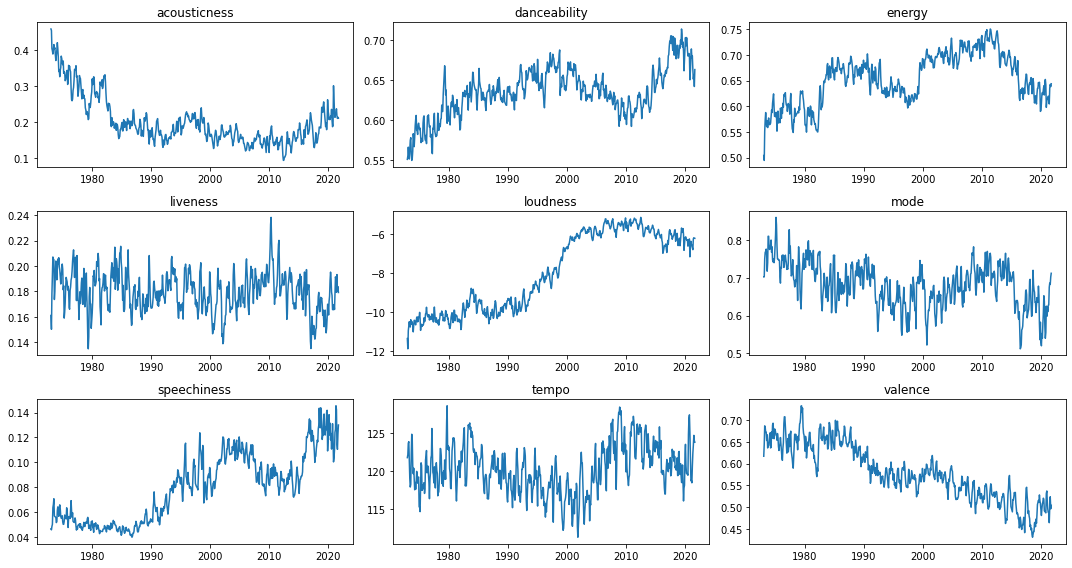

In [66]:
fig = plt.figure(figsize=[15, 8])

ax2 = fig.add_subplot(3, 3, 1)
ax3 = fig.add_subplot(3, 3, 2)
ax5 = fig.add_subplot(3, 3, 3)
ax8 = fig.add_subplot(3, 3, 4)
ax9 = fig.add_subplot(3, 3, 5)
ax10 = fig.add_subplot(3, 3, 6)
ax11 = fig.add_subplot(3, 3, 7)
ax12 = fig.add_subplot(3, 3, 8)
ax14 = fig.add_subplot(3, 3, 9)

x = monthly_df['month']
# y1 = weekly_df['streams']
y2 = monthly_df['acousticness']
y3 = monthly_df['danceability']
# y4 = monthly_df['duration_ms']
y5 = monthly_df['energy']
# y6 = monthly_df['instrumentalness']
# y7 = monthly_df['key']
y8 = monthly_df['liveness']
y9 = monthly_df['loudness']
y10 = monthly_df['mode']
y11 = monthly_df['speechiness']
y12 = monthly_df['tempo']
# y13 = monthly_df['time_signature']
y14 = monthly_df['valence']


# ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
# ax4.plot(x, y4)
ax5.plot(x, y5)
# ax6.plot(x, y6)
# ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)
ax10.plot(x, y10)
ax11.plot(x, y11)
ax12.plot(x, y12)
# ax13.plot(x, y13)
ax14.plot(x, y14)


# ax1.set_title('streams')
ax2.set_title('acousticness')
ax3.set_title('danceability')
# ax4.set_title('duration_ms')
ax5.set_title('energy')
# ax6.set_title('instrumentalness')
# ax7.set_title('key')
ax8.set_title('liveness')
ax9.set_title('loudness')
ax10.set_title('mode')
ax11.set_title('speechiness')
ax12.set_title('tempo')
# ax13.set_title('time_signature')
ax14.set_title('valence')


fig.tight_layout()
plt.show()

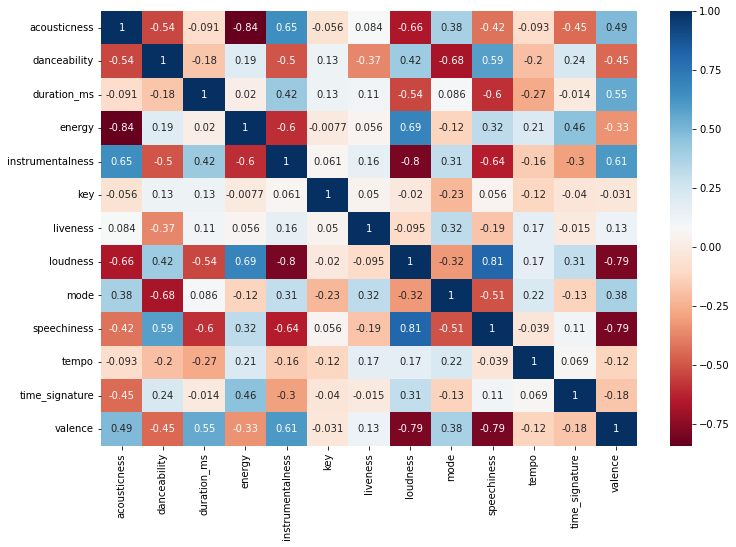

In [54]:
corr = monthly_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="RdBu",annot=True)
plt.show()

In [31]:
unemp = pd.read_csv('/Users/kohtaasakura/PyDev/grad_thesis/economic_indicators/unemployment_rate.csv')
unemp

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
895,2022-08-01,3.7
896,2022-09-01,3.5
897,2022-10-01,3.7
898,2022-11-01,3.6


In [32]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    900 non-null    object 
 1   UNRATE  900 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.2+ KB


In [33]:
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
unemp = unemp[('1973-01-01' <= unemp['DATE']) & (unemp['DATE'] <= '2021-10-01')]
unemp

,DATE,UNRATE
300,1973-01-01,4.9
301,1973-02-01,5.0
302,1973-03-01,4.9
303,1973-04-01,5.0
304,1973-05-01,4.9
...,...,...
881,2021-06-01,5.9
882,2021-07-01,5.4
883,2021-08-01,5.2
884,2021-09-01,4.8


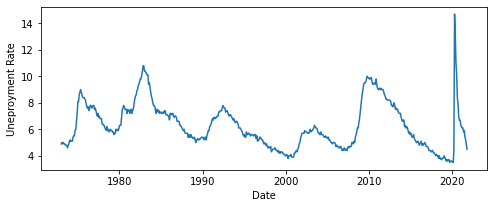

In [57]:
plt.figure(figsize=(8,3))
plt.plot(unemp['DATE'], unemp['UNRATE'])
plt.ylabel('Uneproyment Rate')
plt.xlabel('Date')
plt.show()

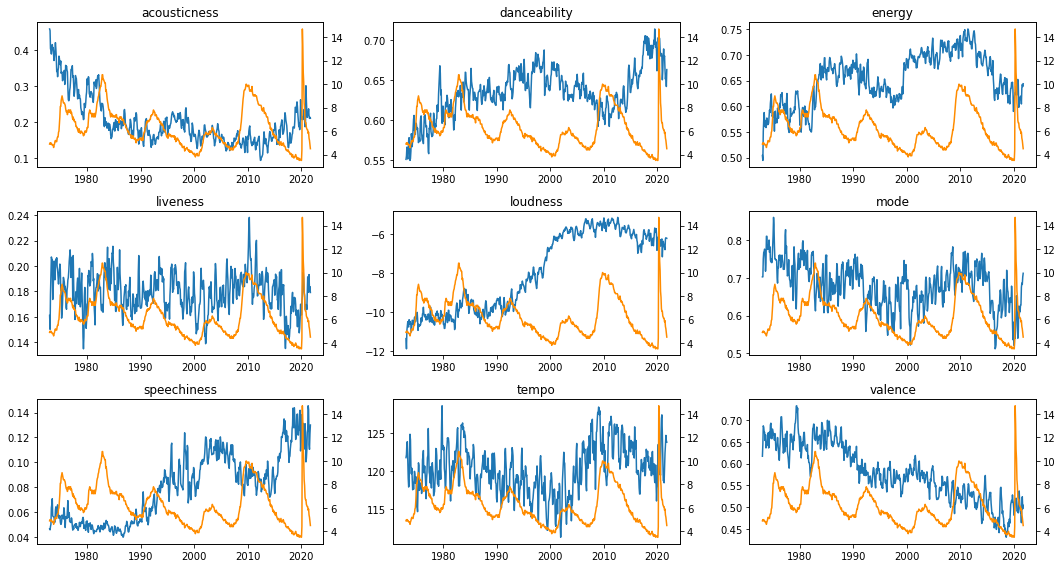

In [73]:
fig = plt.figure(figsize=[15, 8])

ax2 = fig.add_subplot(3, 3, 1)
ax3 = fig.add_subplot(3, 3, 2)
ax5 = fig.add_subplot(3, 3, 3)
ax8 = fig.add_subplot(3, 3, 4)
ax9 = fig.add_subplot(3, 3, 5)
ax10 = fig.add_subplot(3, 3, 6)
ax11 = fig.add_subplot(3, 3, 7)
ax12 = fig.add_subplot(3, 3, 8)
ax14 = fig.add_subplot(3, 3, 9)

x = monthly_df['month']
# y1 = weekly_df['streams']
y2 = monthly_df['acousticness']
y3 = monthly_df['danceability']
# y4 = monthly_df['duration_ms']
y5 = monthly_df['energy']
# y6 = monthly_df['instrumentalness']
# y7 = monthly_df['key']
y8 = monthly_df['liveness']
y9 = monthly_df['loudness']
y10 = monthly_df['mode']
y11 = monthly_df['speechiness']
y12 = monthly_df['tempo']
# y13 = monthly_df['time_signature']
y14 = monthly_df['valence']


# ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
# ax4.plot(x, y4)
ax5.plot(x, y5)
# ax6.plot(x, y6)
# ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)
ax10.plot(x, y10)
ax11.plot(x, y11)
ax12.plot(x, y12)
# ax13.plot(x, y13)
ax14.plot(x, y14)

# ax1_1 = ax1.twinx()
ax2_1 = ax2.twinx()
ax3_1 = ax3.twinx()
# ax4_1 = ax4.twinx()
ax5_1 = ax5.twinx()
# ax6_1 = ax6.twinx()
# ax7_1 = ax7.twinx()
ax8_1 = ax8.twinx()
ax9_1 = ax9.twinx()
ax10_1 = ax10.twinx()
ax11_1 = ax11.twinx()
ax12_1 = ax12.twinx()
# ax13_1 = ax13.twinx()
ax14_1 = ax14.twinx()

z = unemp['UNRATE']

# ax1_1.plot(x, z, color='darkorange')
ax2_1.plot(x, z, color='darkorange')
ax3_1.plot(x, z, color='darkorange')
# ax4_1.plot(x, z, color='darkorange')
ax5_1.plot(x, z, color='darkorange')
# ax6_1.plot(x, z, color='darkorange')
# ax7_1.plot(x, z, color='darkorange')
ax8_1.plot(x, z, color='darkorange')
ax9_1.plot(x, z, color='darkorange')
ax10_1.plot(x, z, color='darkorange')
ax11_1.plot(x, z, color='darkorange')
ax12_1.plot(x, z, color='darkorange')
# ax13_1.plot(x, z, color='darkorange')
ax14_1.plot(x, z, color='darkorange')


# ax1.set_title('streams')
ax2.set_title('acousticness')
ax3.set_title('danceability')
# ax4.set_title('duration_ms')
ax5.set_title('energy')
# ax6.set_title('instrumentalness')
# ax7.set_title('key')
ax8.set_title('liveness')
ax9.set_title('loudness')
ax10.set_title('mode')
ax11.set_title('speechiness')
ax12.set_title('tempo')
# ax13.set_title('time_signature')
ax14.set_title('valence')


fig.tight_layout()
plt.show()


In [35]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['acousticness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.594
Date:                Thu, 12 Jan 2023   Prob (F-statistic):             0.0325
Time:                        12:50:45   Log-Likelihood:                 759.94
No. Observations:                 586   AIC:                            -1516.
Df Residuals:                     584   BIC:                            -1507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1800      0.010     17.148      0.0

In [36]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['danceability']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.51e-22
Time:                        12:51:10   Log-Likelihood:                 1264.0
No. Observations:                 586   AIC:                            -2524.
Df Residuals:                     584   BIC:                            -2515.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6786      0.004    152.769      0.0

In [37]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['duration_ms']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     6.566
Date:                Thu, 12 Jan 2023   Prob (F-statistic):             0.0106
Time:                        12:53:41   Log-Likelihood:                -6633.9
No. Observations:                 586   AIC:                         1.327e+04
Df Residuals:                     584   BIC:                         1.328e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.345e+05   3168.575     74.012      0.0

In [38]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['energy']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7638
Date:                Thu, 12 Jan 2023   Prob (F-statistic):              0.383
Time:                        12:53:55   Log-Likelihood:                 941.77
No. Observations:                 586   AIC:                            -1880.
Df Residuals:                     584   BIC:                            -1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6469      0.008     84.036      0.0

In [39]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['instrumentalness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     36.57
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.63e-09
Time:                        12:54:42   Log-Likelihood:                 1390.3
No. Observations:                 586   AIC:                            -2777.
Df Residuals:                     584   BIC:                            -2768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.004      2.315      0.0

In [40]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['key']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4301
Date:                Thu, 12 Jan 2023   Prob (F-statistic):              0.512
Time:                        12:55:15   Log-Likelihood:                -235.32
No. Observations:                 586   AIC:                             474.6
Df Residuals:                     584   BIC:                             483.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2449      0.057     91.407      0.0

In [41]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['liveness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     92.10
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.38e-20
Time:                        12:55:34   Log-Likelihood:                 1652.6
No. Observations:                 586   AIC:                            -3301.
Df Residuals:                     584   BIC:                            -3293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1588      0.002     69.383      0.0

In [42]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['loudness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     23.97
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.27e-06
Time:                        12:56:24   Log-Likelihood:                -1218.0
No. Observations:                 586   AIC:                             2440.
Df Residuals:                     584   BIC:                             2449.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4944      0.307    -21.160      0.0

In [43]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['mode']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     48.51
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           8.89e-12
Time:                        12:56:49   Log-Likelihood:                 857.55
No. Observations:                 586   AIC:                            -1711.
Df Residuals:                     584   BIC:                            -1702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6220      0.009     69.977      0.0

In [44]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['speechiness']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     116.2
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           7.86e-25
Time:                        12:57:01   Log-Likelihood:                 1338.4
No. Observations:                 586   AIC:                            -2673.
Df Residuals:                     584   BIC:                            -2664.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1202      0.004     30.724      0.0

In [45]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['tempo']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     58.40
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           8.80e-14
Time:                        12:57:27   Log-Likelihood:                -1477.8
No. Observations:                 586   AIC:                             2960.
Df Residuals:                     584   BIC:                             2968.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.7917      0.478    244.242      0.0

In [46]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['time_signature']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                 1.187e-05
Date:                Thu, 12 Jan 2023   Prob (F-statistic):              0.997
Time:                        12:58:34   Log-Likelihood:                 1315.2
No. Observations:                 586   AIC:                            -2626.
Df Residuals:                     584   BIC:                            -2618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9676      0.004    974.692      0.0

In [47]:
x = unemp['UNRATE']
x = sm.add_constant(x)
y = monthly_df[['valence']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     38.18
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.21e-09
Time:                        12:58:43   Log-Likelihood:                 795.87
No. Observations:                 586   AIC:                            -1588.
Df Residuals:                     584   BIC:                            -1579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5206      0.010     52.720      0.0